# Importando Bibliotecas

In [1]:
import pandas as pd
import numpy as np

from scipy.stats import normaltest

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

from yellowbrick.cluster import KElbowVisualizer

from wordcloud import WordCloud

import warnings
warnings.filterwarnings('ignore')

# Lendo os Dados

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


# EDA

### Valores Nulos

In [4]:
df.isna().sum()

valence             0
year                0
acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
dtype: int64

### Distribuição das Variáveis

##### Valence

In [5]:
df['valence'].describe()

count    170653.000000
mean          0.528587
std           0.263171
min           0.000000
25%           0.317000
50%           0.540000
75%           0.747000
max           1.000000
Name: valence, dtype: float64

<AxesSubplot:title={'center':'Valence'}>

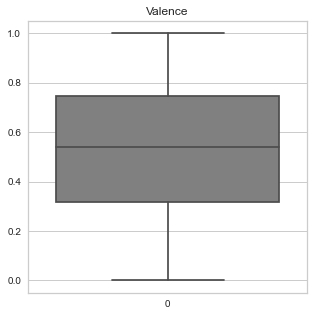

In [6]:
plt.figure(figsize=(5,5))
plt.title('Valence')
sns.boxplot(data=df['valence'], orient='v', color='gray')

<AxesSubplot:title={'center':'Valence'}, xlabel='valence', ylabel='Density'>

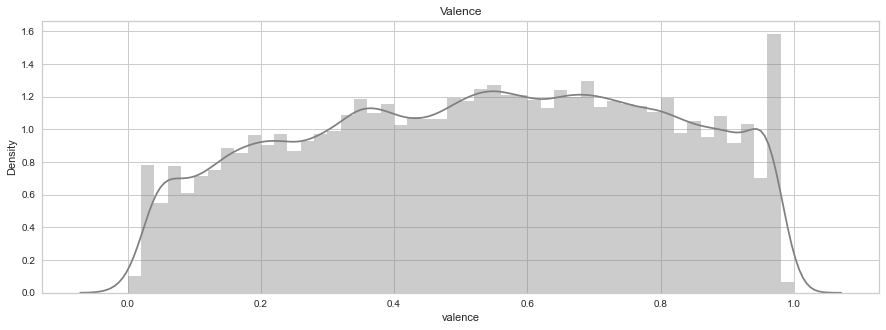

In [7]:
plt.figure(figsize=(15,5))
plt.title('Valence')
sns.distplot(df['valence'], color='gray')

##### Year

<AxesSubplot:title={'center':'Music by Year'}, xlabel='year', ylabel='count'>

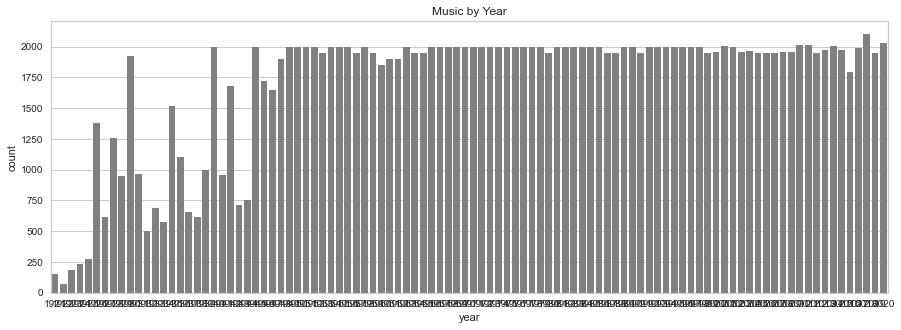

In [8]:
plt.figure(figsize=(15,5))
plt.title('Music by Year')
sns.countplot(df['year'], color='gray')

Muitas músicas e anos, não?

##### Acousticness

<AxesSubplot:title={'center':'Acousticness'}, xlabel='acousticness', ylabel='Density'>

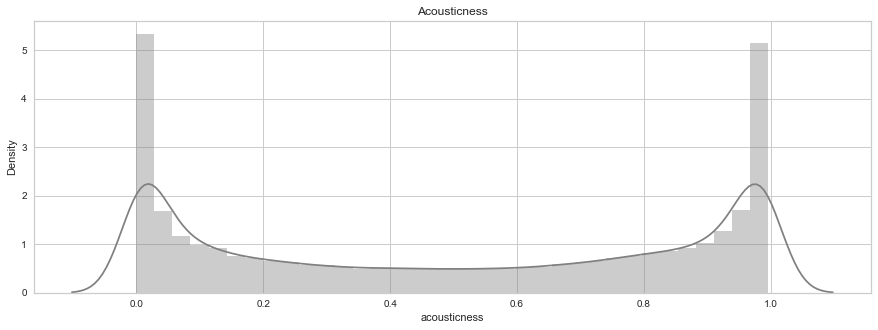

In [9]:
plt.figure(figsize=(15,5))
plt.title('Acousticness')
sns.distplot(df['acousticness'], color='gray')

##### Artists

In [10]:
df['artists'] = df['artists'].str.replace('\[', '', regex=True)
df['artists'] = df['artists'].str.replace('\]', '', regex=True)
df['artists'] = df['artists'].str.split(',')

In [11]:
df['artists']

0         ['Sergei Rachmaninoff',  'James Levine',  'Ber...
1                                            ['Dennis Day']
2         ['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...
3                                          ['Frank Parker']
4                                            ['Phil Regan']
                                ...                        
170648    ['Anuel AA',  'Daddy Yankee',  'KAROL G',  'Oz...
170649                                         ['Ashnikko']
170650                                          ['MAMAMOO']
170651                                           ['Eminem']
170652                               ['KEVVO',  'J Balvin']
Name: artists, Length: 170653, dtype: object

In [12]:
df[['artists']]

,artists
0,"['Sergei Rachmaninoff', 'James Levine', 'Ber..."
1,['Dennis Day']
2,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...
3,['Frank Parker']
4,['Phil Regan']
...,...
170648,"['Anuel AA', 'Daddy Yankee', 'KAROL G', 'Oz..."
170649,['Ashnikko']
170650,['MAMAMOO']
170651,['Eminem']


In [13]:
df_new = df[['artists']].explode('artists')
df_new

,artists
0,'Sergei Rachmaninoff'
0,'James Levine'
0,'Berliner Philharmoniker'
1,'Dennis Day'
2,'KHP Kridhamardawa Karaton Ngayogyakarta Hadin...
...,...
170649,'Ashnikko'
170650,'MAMAMOO'
170651,'Eminem'
170652,'KEVVO'


In [14]:
artists_list = df_new['artists'].unique().tolist()

In [15]:
df_new['artists'] = df_new['artists'].str.replace('$', 's')

In [16]:
df_artists = pd.DataFrame(df_new['artists'].value_counts())
df_artists.reset_index(inplace=True)
df_artists

,index,artists
0,'Francisco Canaro',2227
1,'Эрнест Хемингуэй',1211
2,'Эрих Мария Ремарк',1068
3,'Frédéric Chopin',1016
4,'Wolfgang Amadeus Mozart',920
...,...,...
32649,'David Cole',1
32650,'Florante',1
32651,'Anthony Thistlethwaite',1
32652,'Benjamin Orr',1


<AxesSubplot:title={'center':'10 Artists with most Songs in Spotify'}, xlabel='index', ylabel='artists'>

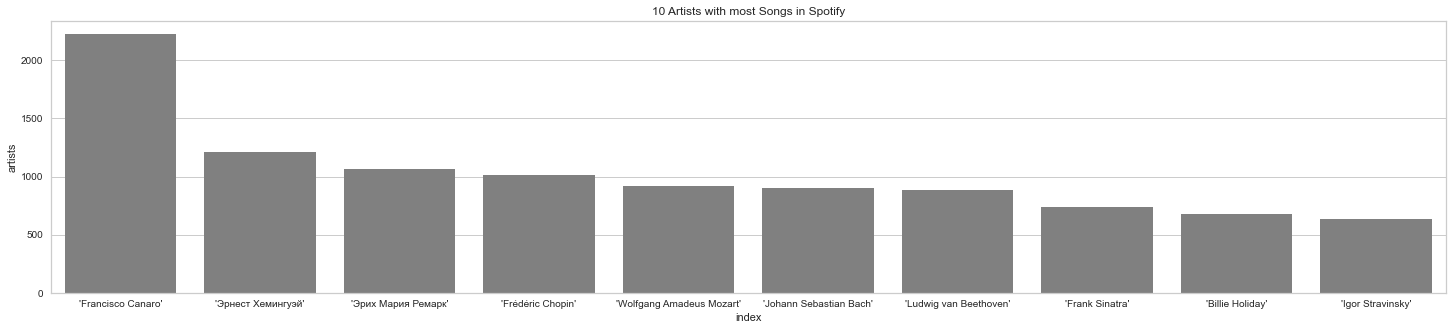

In [17]:
plt.figure(figsize=(25,5))
plt.title('10 Artists with most Songs in Spotify')
sns.barplot(data=df_artists[:10], x='index', y='artists', color='gray')

##### Danceability

In [18]:
df['danceability'].describe()

count    170653.000000
mean          0.537396
std           0.176138
min           0.000000
25%           0.415000
50%           0.548000
75%           0.668000
max           0.988000
Name: danceability, dtype: float64

<AxesSubplot:title={'center':'Danceability'}>

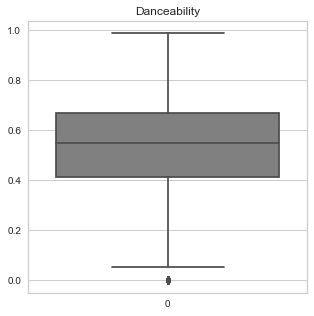

In [19]:
plt.figure(figsize=(5,5))
plt.title('Danceability')
sns.boxplot(data=df['danceability'], orient='v', color='gray')

<AxesSubplot:title={'center':'Danceability'}, xlabel='danceability', ylabel='Density'>

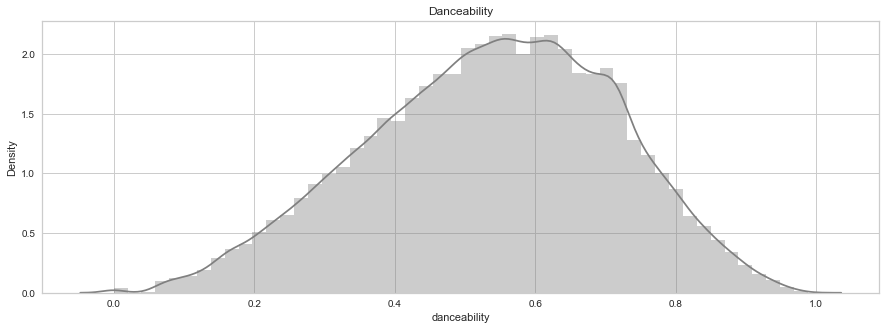

In [20]:
plt.figure(figsize=(15,5))
plt.title('Danceability')
sns.distplot(df['danceability'], color='gray')

In [21]:
def normal_test(feature, array, alpha=0.05):
    p = normaltest(array).pvalue
    if p < alpha:
        print(f'Rejeita H0. A feature {feature} NÃO está normalmente distribuída')
    else:
        print(f'Aceita H0. A feature {feature} está normalmente distribuída. P-valor = {p} >= {alpha}')

In [22]:
normal_test('danceability', df['danceability'].values)

Rejeita H0. A feature danceability NÃO está normalmente distribuída


##### Duration

In [23]:
df['duration_ms'].describe()

count    1.706530e+05
mean     2.309483e+05
std      1.261184e+05
min      5.108000e+03
25%      1.698270e+05
50%      2.074670e+05
75%      2.624000e+05
max      5.403500e+06
Name: duration_ms, dtype: float64

<AxesSubplot:title={'center':'Duration (miliseconds)'}>

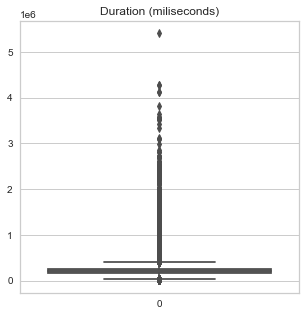

In [24]:
plt.figure(figsize=(5,5))
plt.title('Duration (miliseconds)')
sns.boxplot(data=df['duration_ms'], orient='v', color='gray')

<AxesSubplot:title={'center':'Duration (miliseconds)'}, xlabel='duration_ms', ylabel='Density'>

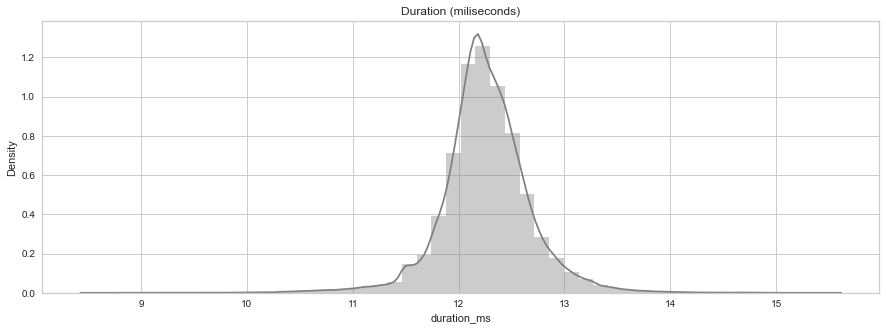

In [25]:
plt.figure(figsize=(15,5))
plt.title('Duration (miliseconds)')
sns.distplot(np.log(df['duration_ms']), color='gray')

In [26]:
normal_test('duration', df['duration_ms'].values)

Rejeita H0. A feature duration NÃO está normalmente distribuída


##### Energy

In [27]:
df['energy'].describe()

count    170653.000000
mean          0.482389
std           0.267646
min           0.000000
25%           0.255000
50%           0.471000
75%           0.703000
max           1.000000
Name: energy, dtype: float64

<AxesSubplot:title={'center':'Energy'}>

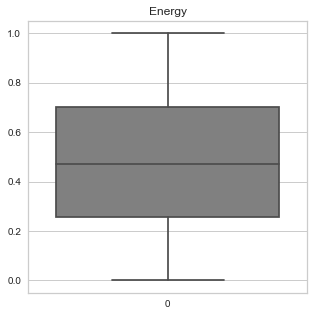

In [28]:
plt.figure(figsize=(5,5))
plt.title('Energy')
sns.boxplot(data=df['energy'], orient='v', color='gray')

<AxesSubplot:title={'center':'Energy'}, xlabel='energy', ylabel='Density'>

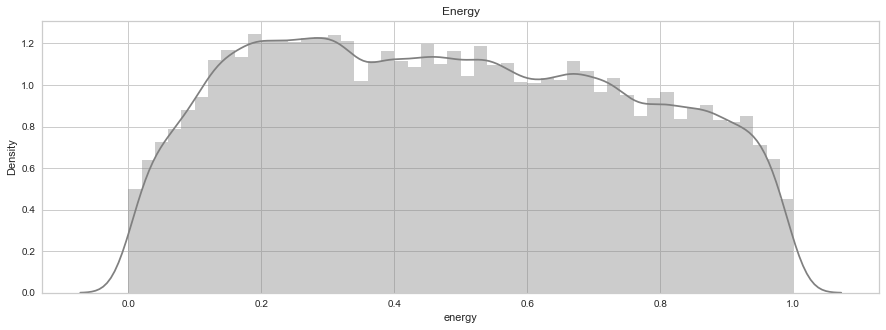

In [29]:
plt.figure(figsize=(15,5))
plt.title('Energy')
sns.distplot(df['energy'], color='gray')

##### Explicit

In [30]:
df['explicit'].value_counts()

0    156220
1     14433
Name: explicit, dtype: int64

<AxesSubplot:title={'center':'Musics with Explicit Content'}, xlabel='explicit', ylabel='count'>

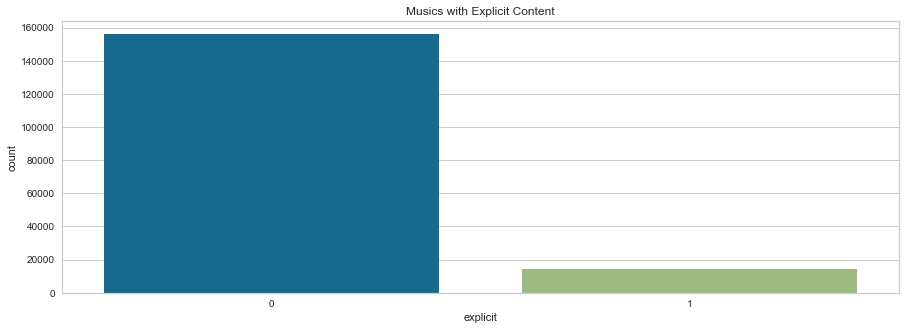

In [31]:
plt.figure(figsize=(15,5))
plt.title('Musics with Explicit Content')
sns.countplot(df['explicit'])

##### Instrumentalness

In [32]:
df['instrumentalness'].describe()

count    170653.000000
mean          0.167010
std           0.313475
min           0.000000
25%           0.000000
50%           0.000216
75%           0.102000
max           1.000000
Name: instrumentalness, dtype: float64

<AxesSubplot:title={'center':'Instrumentalness'}, xlabel='instrumentalness', ylabel='Density'>

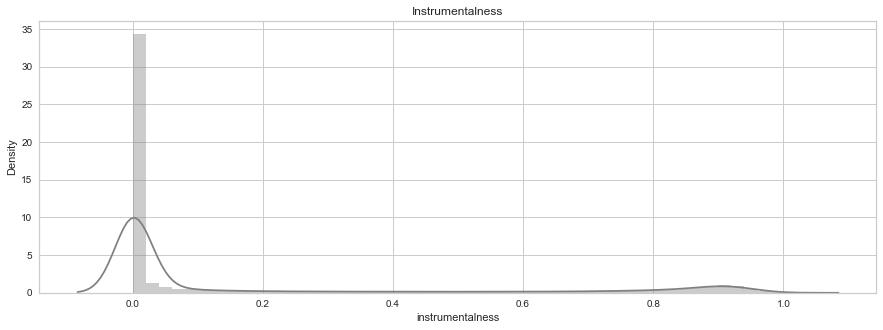

In [33]:
plt.figure(figsize=(15,5))
plt.title('Instrumentalness')
sns.distplot(df['instrumentalness'], color='gray')

##### Key

In [34]:
df['key'].describe()

count    170653.000000
mean          5.199844
std           3.515094
min           0.000000
25%           2.000000
50%           5.000000
75%           8.000000
max          11.000000
Name: key, dtype: float64

<AxesSubplot:title={'center':'Key'}, xlabel='key', ylabel='count'>

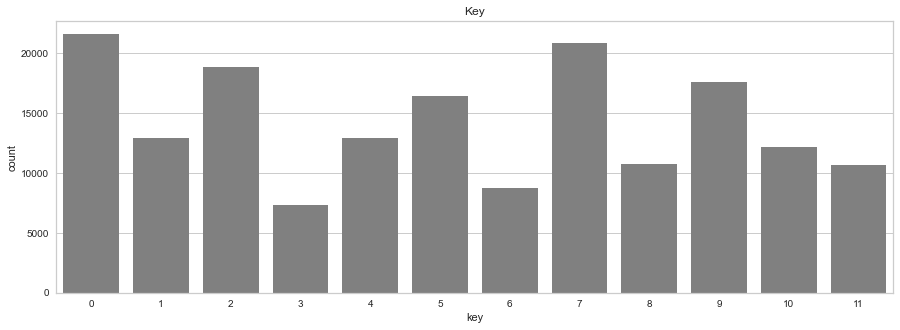

In [35]:
plt.figure(figsize=(15,5))
plt.title('Key')
sns.countplot(df['key'], color='gray')

##### Liveness

In [36]:
df['liveness'].describe()

count    170653.000000
mean          0.205839
std           0.174805
min           0.000000
25%           0.098800
50%           0.136000
75%           0.261000
max           1.000000
Name: liveness, dtype: float64

<AxesSubplot:title={'center':'Liveness'}>

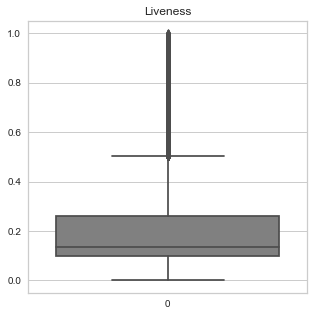

In [37]:
plt.figure(figsize=(5,5))
plt.title('Liveness')
sns.boxplot(data=df['liveness'], orient='v', color='gray')

<AxesSubplot:title={'center':'Liveness'}, xlabel='liveness', ylabel='Density'>

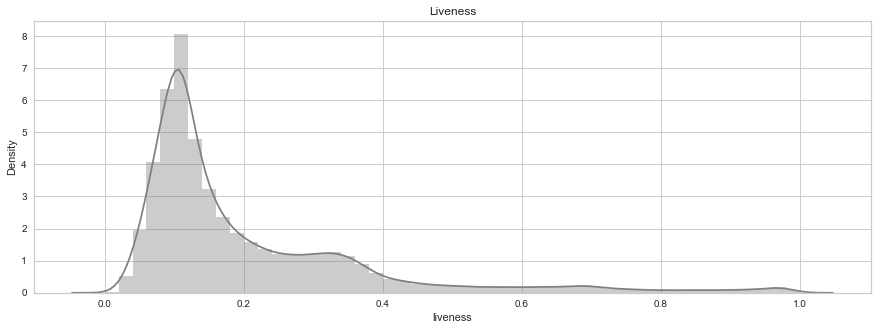

In [38]:
plt.figure(figsize=(15,5))
plt.title('Liveness')
sns.distplot(df['liveness'], color='gray')

##### Loudness

In [39]:
df['loudness'].describe()

count    170653.000000
mean        -11.467990
std           5.697943
min         -60.000000
25%         -14.615000
50%         -10.580000
75%          -7.183000
max           3.855000
Name: loudness, dtype: float64

<AxesSubplot:title={'center':'Loudeness'}>

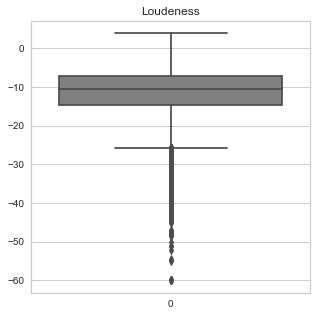

In [40]:
plt.figure(figsize=(5,5))
plt.title('Loudeness')
sns.boxplot(data=df['loudness'], orient='v', color='gray')

<AxesSubplot:title={'center':'Loudness'}, xlabel='loudness', ylabel='Density'>

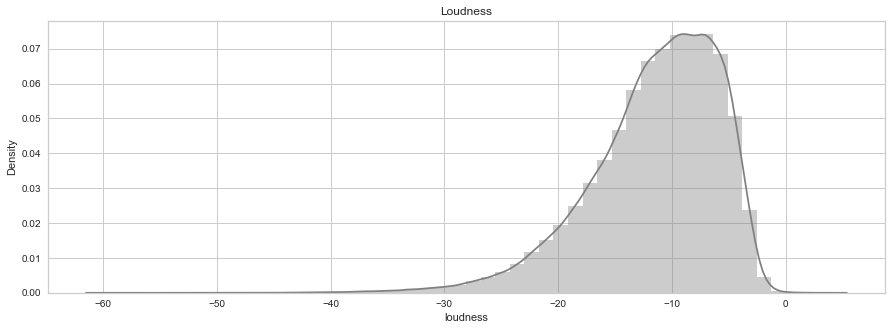

In [41]:
plt.figure(figsize=(15,5))
plt.title('Loudness')
sns.distplot(df['loudness'], color='gray')

In [42]:
normal_test('loudness', df['loudness'].values)

Rejeita H0. A feature loudness NÃO está normalmente distribuída


##### Mode

In [43]:
df['mode'].value_counts()

1    120635
0     50018
Name: mode, dtype: int64

<AxesSubplot:xlabel='mode', ylabel='count'>

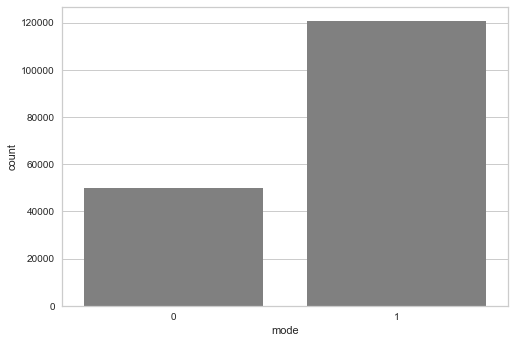

In [44]:
sns.countplot(df['mode'], color='gray')

##### Popularity

In [45]:
df['popularity'].describe()

count    170653.000000
mean         31.431794
std          21.826615
min           0.000000
25%          11.000000
50%          33.000000
75%          48.000000
max         100.000000
Name: popularity, dtype: float64

<AxesSubplot:title={'center':'Popularity'}>

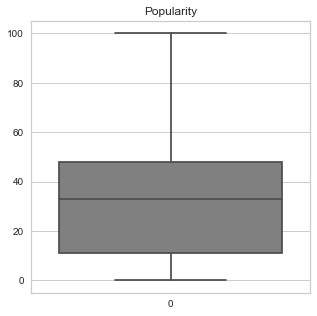

In [46]:
plt.figure(figsize=(5,5))
plt.title('Popularity')
sns.boxplot(data=df['popularity'], orient='v', color='gray')

<AxesSubplot:title={'center':'Popularity'}, xlabel='popularity', ylabel='Density'>

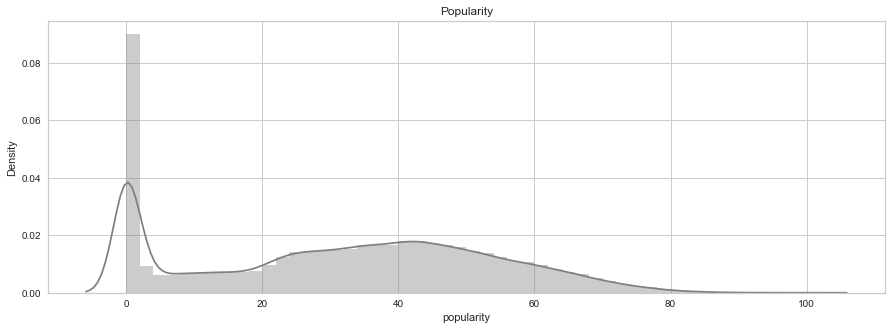

In [47]:
plt.figure(figsize=(15,5))
plt.title('Popularity')
sns.distplot(df['popularity'], color='gray')

##### Speechiness

In [48]:
df['speechiness'].describe()

count    170653.000000
mean          0.098393
std           0.162740
min           0.000000
25%           0.034900
50%           0.045000
75%           0.075600
max           0.970000
Name: speechiness, dtype: float64

<AxesSubplot:title={'center':'Speechiness'}>

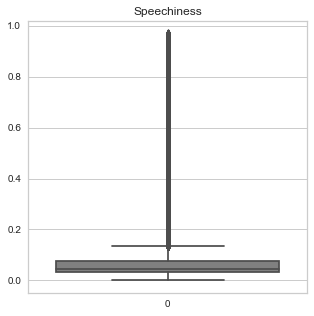

In [49]:
plt.figure(figsize=(5,5))
plt.title('Speechiness')
sns.boxplot(data=df['speechiness'], orient='v', color='gray')

<AxesSubplot:title={'center':'Speechiness'}, xlabel='speechiness', ylabel='Density'>

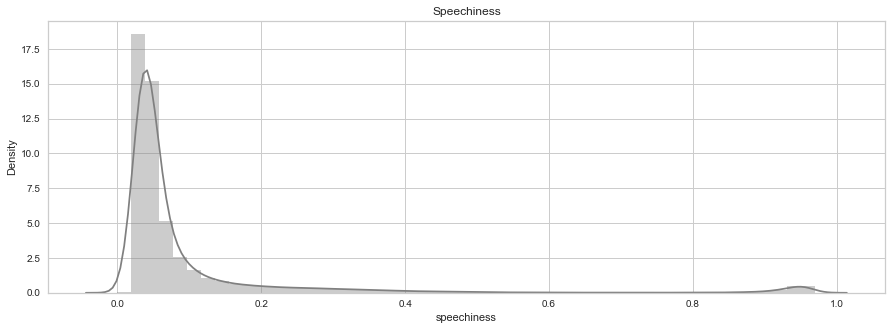

In [50]:
plt.figure(figsize=(15,5))
plt.title('Speechiness')
sns.distplot(df['speechiness'], color='gray')

##### Tempo

In [51]:
df['tempo'].describe()

count    170653.000000
mean        116.861590
std          30.708533
min           0.000000
25%          93.421000
50%         114.729000
75%         135.537000
max         243.507000
Name: tempo, dtype: float64

<AxesSubplot:title={'center':'Tempo'}>

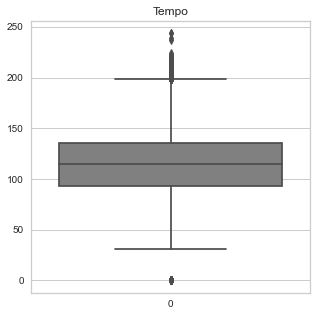

In [52]:
plt.figure(figsize=(5,5))
plt.title('Tempo')
sns.boxplot(data=df['tempo'], orient='v', color='gray')

<AxesSubplot:title={'center':'Tempo'}, xlabel='tempo', ylabel='Density'>

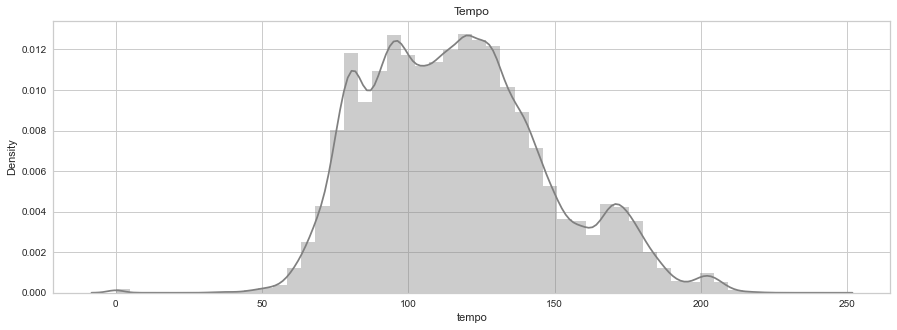

In [53]:
plt.figure(figsize=(15,5))
plt.title('Tempo')
sns.distplot(df['tempo'], color='gray')

In [54]:
normal_test('tempo', df['tempo'].values)

Rejeita H0. A feature tempo NÃO está normalmente distribuída


# Modelo

In [55]:
df.columns

Index(['valence', 'year', 'acousticness', 'artists', 'danceability',
       'duration_ms', 'energy', 'explicit', 'id', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode', 'name', 'popularity', 'release_date',
       'speechiness', 'tempo'],
      dtype='object')

In [56]:
X = df.drop(['artists', 'id', 'name', 'release_date', 'year'], axis=1)

In [57]:
X = MinMaxScaler().fit_transform(X)

### K-Means

##### Elbow

1 158871.3670348308
2 123062.50851047313
3 100663.81774396676
4 89721.72793116274
5 80601.4912942387
6 76203.95636371028
7 68316.55388590753
8 65008.50471247646
9 61948.78229717737
10 58326.27978440517
11 56639.37374278069
12 54620.57467831867
13 54170.812343535945
14 51621.11699707201
15 50455.01044733262
16 49532.13644476819
17 48205.588754542376
18 47293.77948783898
19 45717.85864619211
20 44523.91856548557
21 44267.58324464388
22 43188.090424291615
23 41846.931199216815
24 41799.11967694551
25 41121.08583342921
26 40037.38718215254
27 39719.863183330956
28 39255.49641439125
29 39201.245388946336
30 37947.21802312248


Text(0, 0.5, 'WCSS')

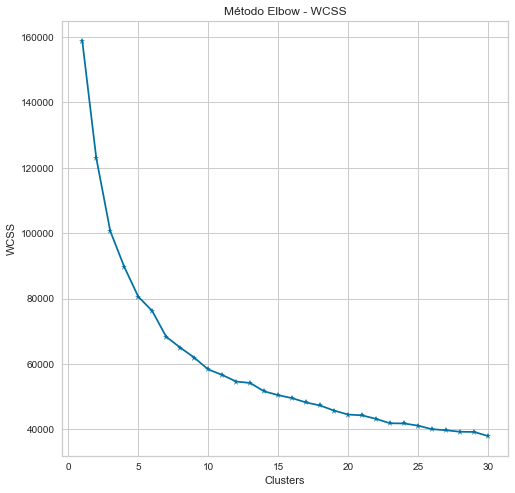

In [58]:
plt.figure(figsize=(8,8))

wcss = []

for i in range(1,31):
    kmeans = KMeans(n_clusters=i, init='random')
    kmeans.fit(X)
    print(i, kmeans.inertia_)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,31), wcss, '*-')
plt.title('Método Elbow - WCSS')
plt.xlabel('Clusters')
plt.ylabel('WCSS')

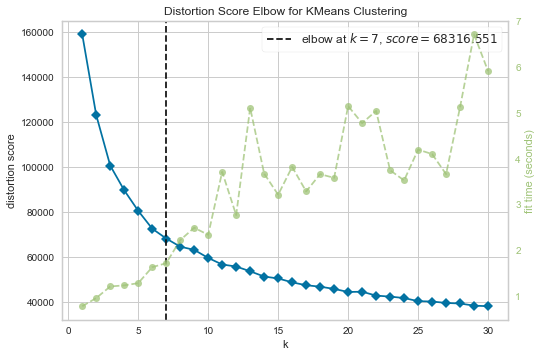

In [59]:
vis = KElbowVisualizer(kmeans, k=(1,31))
vis.fit(X)
vis.show();

##### Davies-Bouldin

2 1.5307968128375542
3 1.5693552445869783
4 1.583201455040262
5 1.580185884945535
6 1.5597973242274346
7 1.5686882247178184
8 1.5586220064223302
9 1.5583055788977747
10 1.5250581132260677
11 1.5641948969316875
12 1.5610349896166678
13 1.5481612512932508
14 1.573436434670481
15 1.5880157676294844
16 1.5806100202314062
17 1.5703876172675812
18 1.5594667585600883
19 1.5171266048374195
20 1.5369388817018503
21 1.5374211686997874
22 1.5154789054712314
23 1.5493274714957186
24 1.6051619043311094
25 1.595395747387747
26 1.520223408582759
27 1.5425393267972722
28 1.5573268270434693
29 1.5949580581245077
30 1.528309113022565


Text(0, 0.5, 'Score')

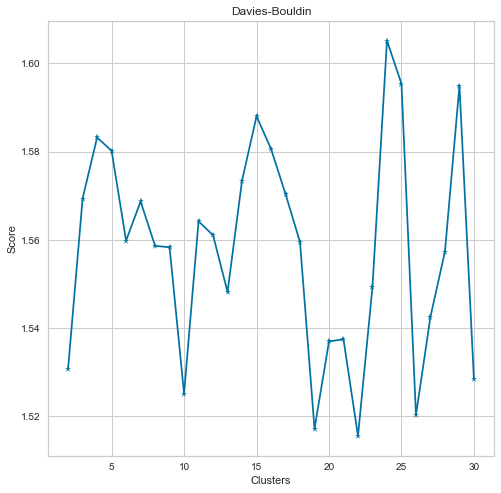

In [60]:
plt.figure(figsize=(8,8))

scores = []
n_cluster_list = np.arange(2,31).astype(int)

for n_cluster in n_cluster_list:
    kmeans = KMeans(n_clusters=i, init='random')
    cluster_found = kmeans.fit_predict(X)
    score = davies_bouldin_score(X, cluster_found)
    scores.append(score)
    print(n_cluster, score)

plt.plot(range(2,31), scores, '*-')
plt.title('Davies-Bouldin')
plt.xlabel('Clusters')
plt.ylabel('Score')

##### Silhouette

7 0.17315001811241004
8 0.17466618772485448
9 0.1785845332375073
10 0.1721947828924075
11 0.17123840825383427
12 0.16831370341060878
13 0.16963198430249662
14 0.1680351784573913
15 0.170432776276767
16 0.17056795268529415
17 0.1727936135321838
18 0.17304713809029526
19 0.17085221073698054
20 0.17325892434179718
21 0.17048927467595085


Text(0, 0.5, 'Score')

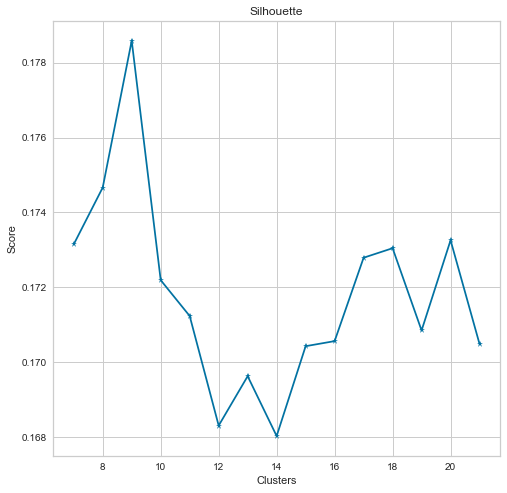

In [61]:
plt.figure(figsize=(8,8))

scores = []
n_cluster_list = np.arange(7,22).astype(int)

for n_cluster in n_cluster_list:
    kmeans = KMeans(n_clusters=i, init='random')
    cluster_found = kmeans.fit_predict(X)
    score = silhouette_score(X, cluster_found)
    scores.append(score)
    print(n_cluster, score)

plt.plot(range(7,22), scores, '*-')
plt.title('Silhouette')
plt.xlabel('Clusters')
plt.ylabel('Score')

##### Modelo

In [62]:
k = 7

In [63]:
kmeans = KMeans(n_clusters=k)

In [64]:
cluster_found = kmeans.fit_predict(X)
silhouette = silhouette_score(X, cluster_found)
davies_bouldin = davies_bouldin_score(X, cluster_found)

In [65]:
print(f'''
      Resultados da Clusterização utilizando o K-Means:
      Silhouette: {round(silhouette,2)}
      Davies-Bouldin: {round(davies_bouldin,2)}
      ''')


      Resultados da Clusterização utilizando o K-Means:
      Silhouette: 0.21
      Davies-Bouldin: 1.51
      


# Avaliação de Clusters

In [66]:
df['cluster'] = cluster_found

In [67]:
df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,cluster
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Ber...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954,4
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936,5
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339,4
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109,5
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665,5


### Modelo Supervisionado

In [68]:
X_rf = df.drop(['artists', 'id', 'name', 'release_date', 'year', 'cluster'], axis=1)
y_rf = df['cluster']

In [69]:
modelo = RandomForestClassifier()
modelo.fit(X_rf, y_rf)

RandomForestClassifier()

In [70]:
pred = modelo.predict(X_rf)

In [71]:
accuracy = metrics.accuracy_score(y_rf, pred)
print(accuracy)

1.0


Text(0.5, 1.0, 'Random Forest Feature Importance')

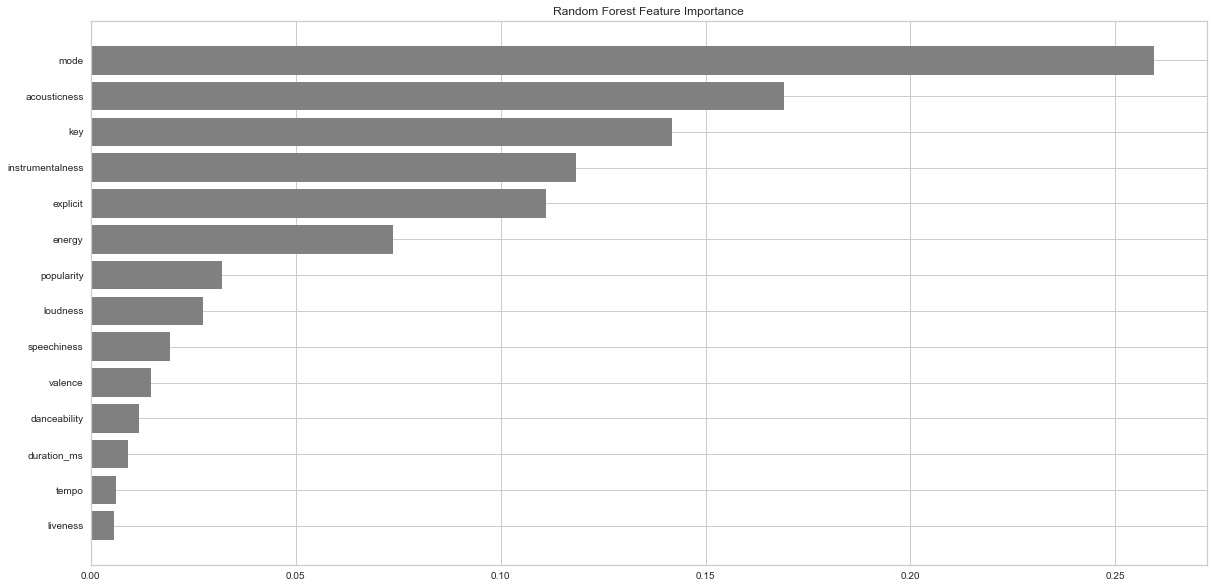

In [72]:
sorted_idx = modelo.feature_importances_.argsort()

plt.figure(figsize=(20,10))
plt.barh(modelo.feature_names_in_[sorted_idx], modelo.feature_importances_[sorted_idx], color='gray')
plt.title("Random Forest Feature Importance")

### Mode

<AxesSubplot:title={'center':'Mode'}, xlabel='cluster', ylabel='mode'>

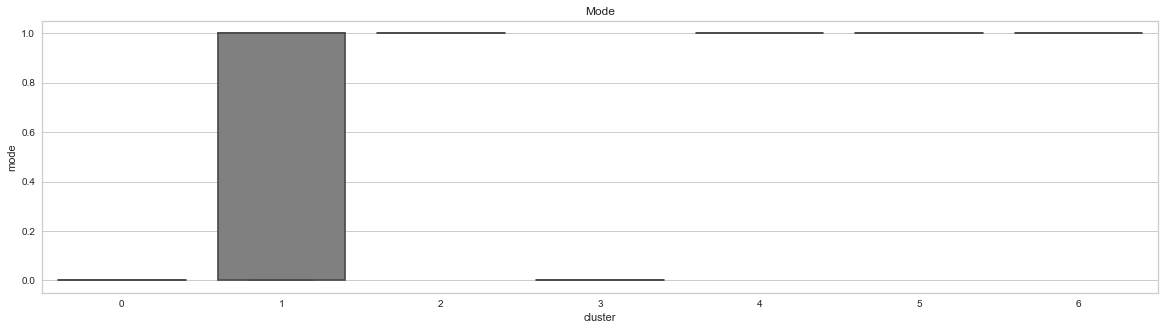

In [73]:
plt.figure(figsize=(20,5))
plt.title('Mode')
sns.boxplot(data=df, orient='v', y='mode', x='cluster', color='gray')

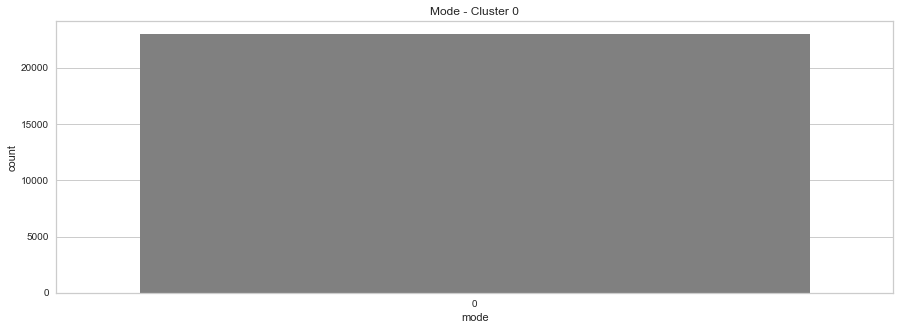

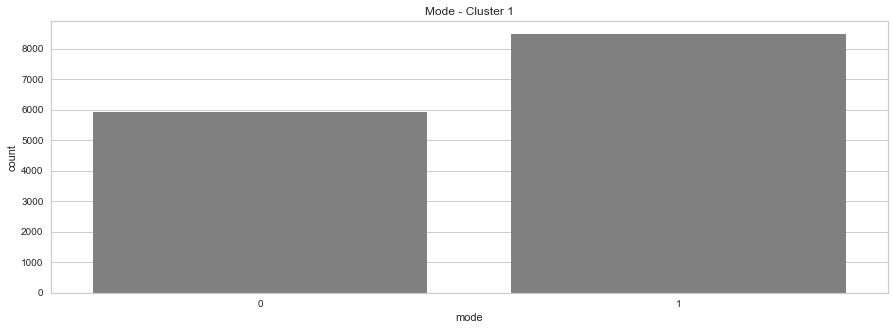

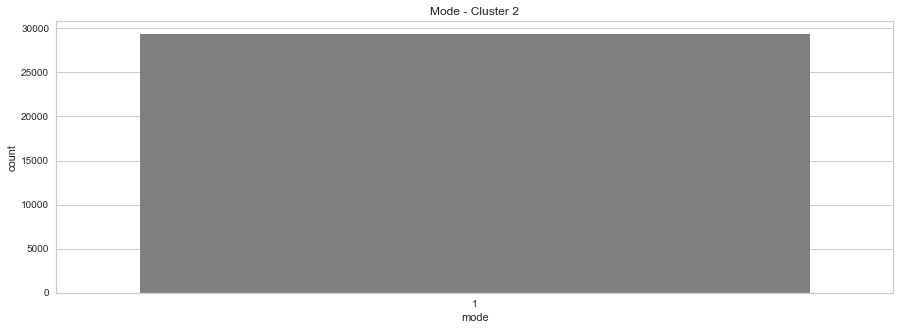

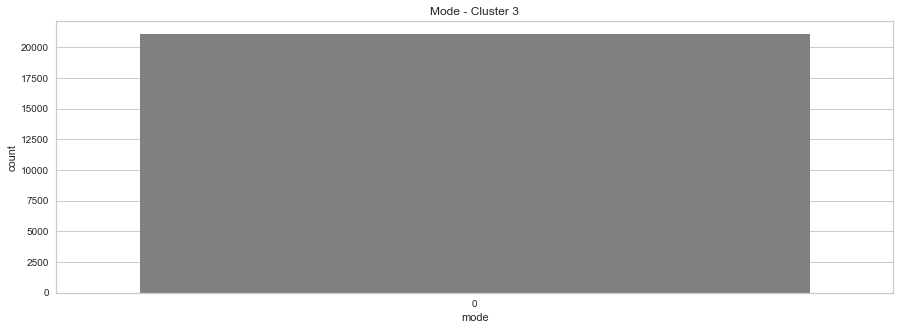

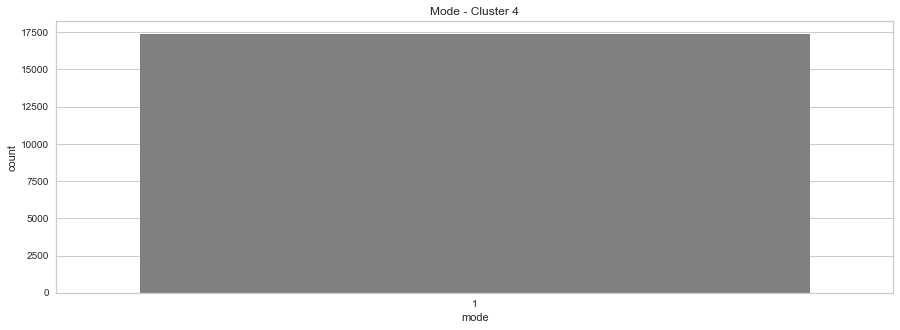

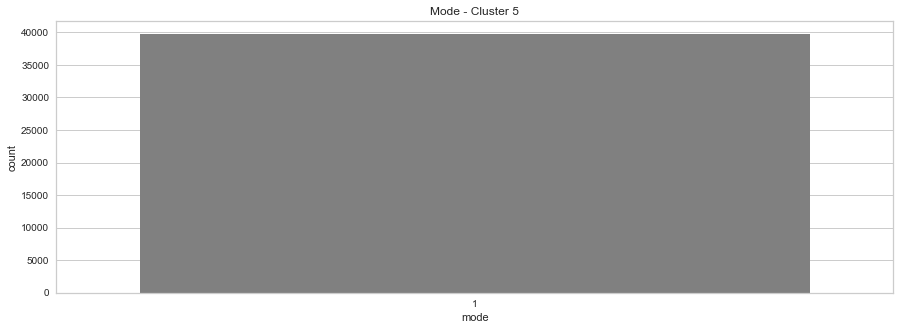

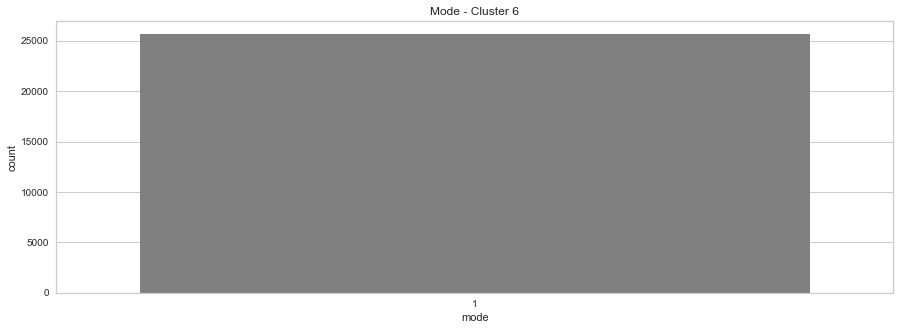

In [74]:
for cluster in sorted(df['cluster'].unique().tolist()):
    df_cluster = df.loc[df['cluster'] == cluster]
    plt.figure(figsize=(15,5))
    plt.title(f'Mode - Cluster {cluster}')
    sns.countplot(df_cluster['mode'], color='gray')

**Mode:** Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

### Acousticness

<AxesSubplot:title={'center':'Acousticness'}, xlabel='cluster', ylabel='acousticness'>

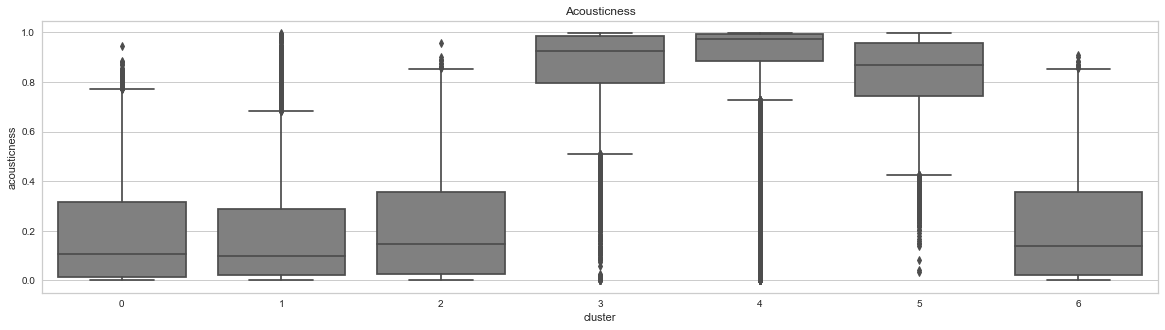

In [75]:
plt.figure(figsize=(20,5))
plt.title('Acousticness')
sns.boxplot(data=df, orient='v', y='acousticness', x='cluster', color='gray')

In [76]:
df.groupby('cluster')['acousticness'].describe().sort_values(by='mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
4,17375.0,0.897107,0.171328,0.000000,0.8860,0.9720,0.9920,0.996
3,21088.0,0.865150,0.152907,0.000000,0.7940,0.9250,0.9840,0.996
5,39751.0,0.833550,0.145636,0.034500,0.7450,0.8690,0.9590,0.996
2,29354.0,0.211071,0.206842,0.000000,0.0258,0.1460,0.3570,0.957
6,25677.0,0.209578,0.209364,0.000000,0.0228,0.1400,0.3550,0.910
1,14403.0,0.196378,0.233656,0.000001,0.0221,0.0976,0.2865,0.996
0,23005.0,0.187605,0.203646,0.000000,0.0150,0.1060,0.3170,0.944


**Acousticness:** A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

### Key

<AxesSubplot:title={'center':'Key'}, xlabel='cluster', ylabel='key'>

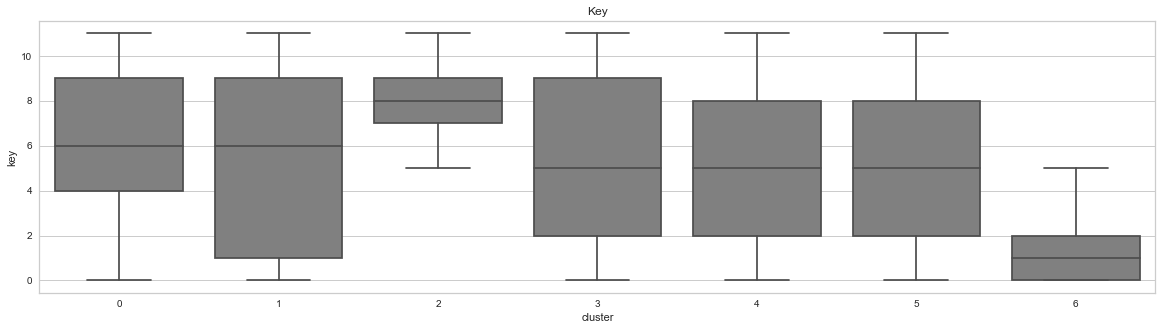

In [77]:
plt.figure(figsize=(20,5))
plt.title('Key')
sns.boxplot(data=df, orient='v', y='key', x='cluster', color='gray')

In [78]:
df.groupby('cluster')['key'].describe().sort_values(by='mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
2,29354.0,7.905567,1.748643,5.0,7.0,8.0,9.0,11.0
0,23005.0,6.138187,3.507572,0.0,4.0,6.0,9.0,11.0
3,21088.0,5.318190,3.417912,0.0,2.0,5.0,9.0,11.0
1,14403.0,5.263348,3.736756,0.0,1.0,6.0,9.0,11.0
5,39751.0,5.093633,3.345819,0.0,2.0,5.0,8.0,11.0
4,17375.0,4.943022,3.405465,0.0,2.0,5.0,8.0,11.0
6,25677.0,1.471356,1.364658,0.0,0.0,1.0,2.0,5.0


**Key:** The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.

### Instrumentalness

<AxesSubplot:title={'center':'Instrumentalness'}, xlabel='cluster', ylabel='instrumentalness'>

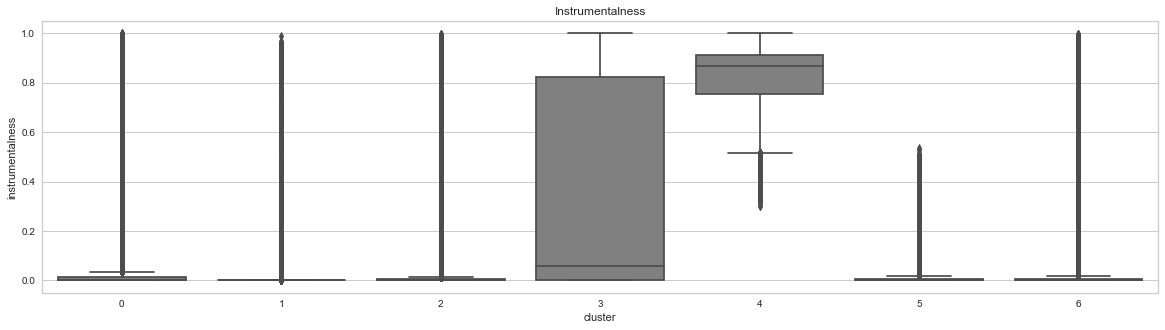

In [79]:
plt.figure(figsize=(20,5))
plt.title('Instrumentalness')
sns.boxplot(data=df, orient='v', y='instrumentalness', x='cluster', color='gray')

**Instrumentalness:** Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

### Explicit

In [ ]:
df.groupby('cluster')['explicit'].describe().sort_values(by='count', ascending=False)

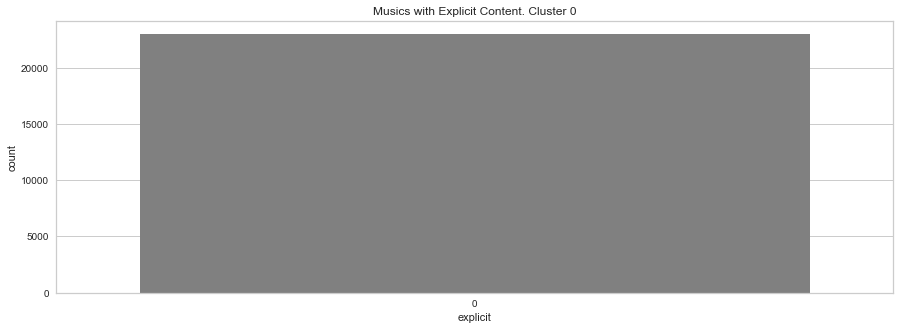

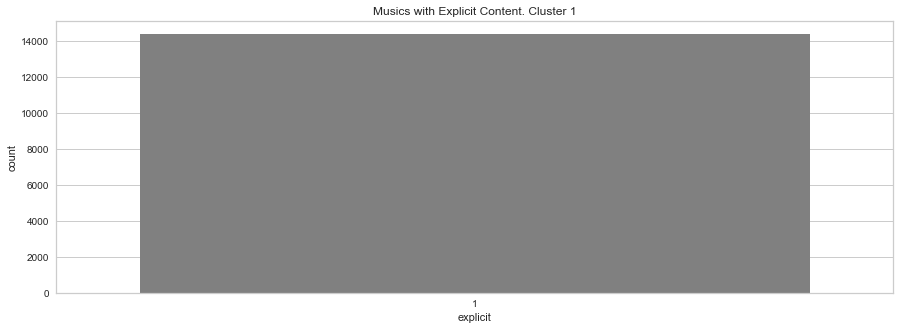

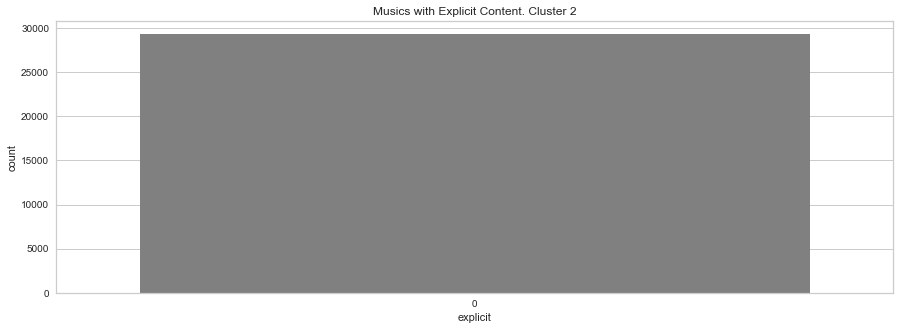

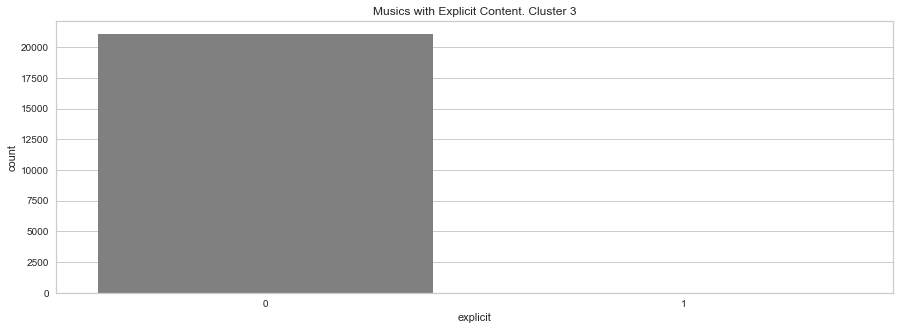

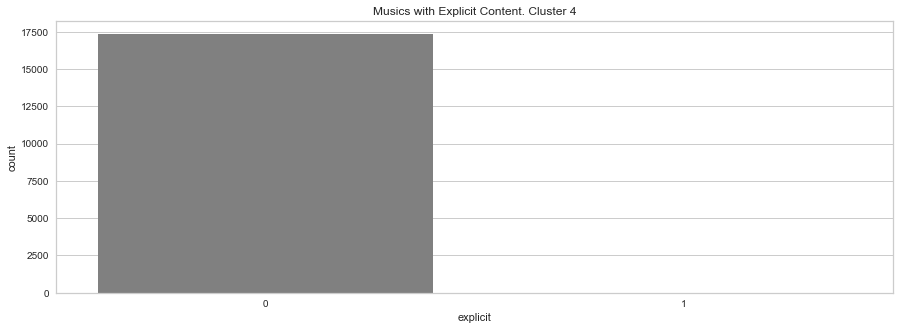

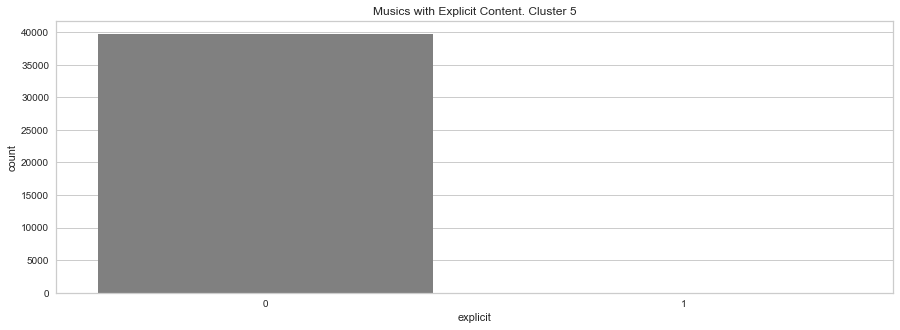

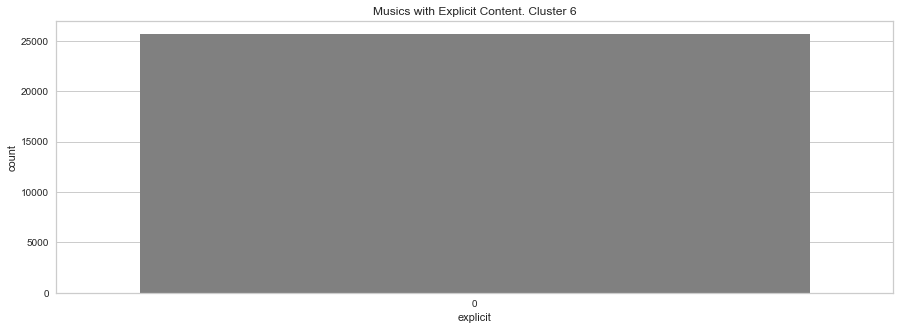

In [80]:
for cluster in sorted(df['cluster'].unique().tolist()):
    df_cluster = df.loc[df['cluster'] == cluster]
    plt.figure(figsize=(15,5))
    plt.title(f'Musics with Explicit Content. Cluster {cluster}')
    sns.countplot(df_cluster['explicit'], color='gray')

**Explicit:** Explicit content

### Energy

<AxesSubplot:title={'center':'Energy'}, xlabel='cluster', ylabel='energy'>

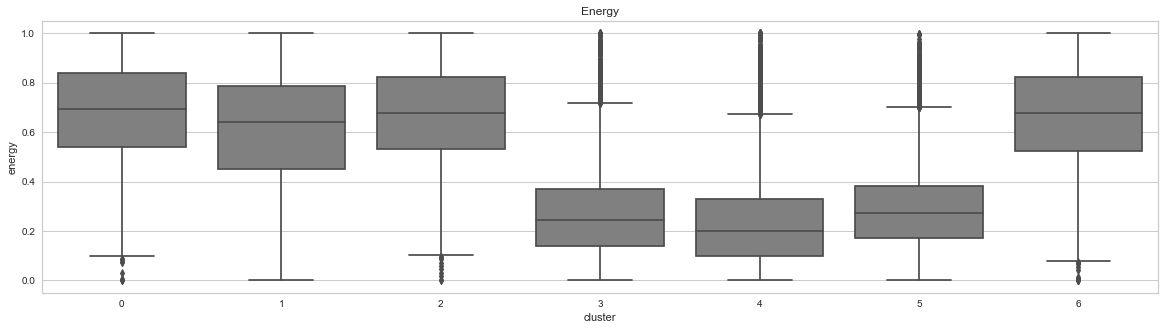

In [81]:
plt.figure(figsize=(20,5))
plt.title('Energy')
sns.boxplot(data=df, orient='v', y='energy', x='cluster', color='gray')

In [82]:
df.groupby('cluster')['energy'].describe().sort_values(by='mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,23005.0,0.682310,0.186023,0.00002,0.5420,0.693,0.838,1.000
2,29354.0,0.671325,0.183690,0.00002,0.5320,0.677,0.822,1.000
6,25677.0,0.667199,0.189217,0.00002,0.5250,0.676,0.825,1.000
1,14403.0,0.600023,0.243800,0.00002,0.4520,0.640,0.786,1.000
5,39751.0,0.286795,0.152700,0.00002,0.1730,0.272,0.384,0.999
3,21088.0,0.267855,0.168761,0.00000,0.1400,0.246,0.371,1.000
4,17375.0,0.235729,0.176827,0.00002,0.0997,0.200,0.329,1.000


**Energy:** Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

### Artists

In [83]:
df_new = df[['artists','cluster']].explode('artists')
df_new

,artists,cluster
0,'Sergei Rachmaninoff',4
0,'James Levine',4
0,'Berliner Philharmoniker',4
1,'Dennis Day',5
2,'KHP Kridhamardawa Karaton Ngayogyakarta Hadin...,4
...,...,...
170649,'Ashnikko',2
170650,'MAMAMOO',0
170651,'Eminem',1
170652,'KEVVO',1


##### Cluster 0 - Artists

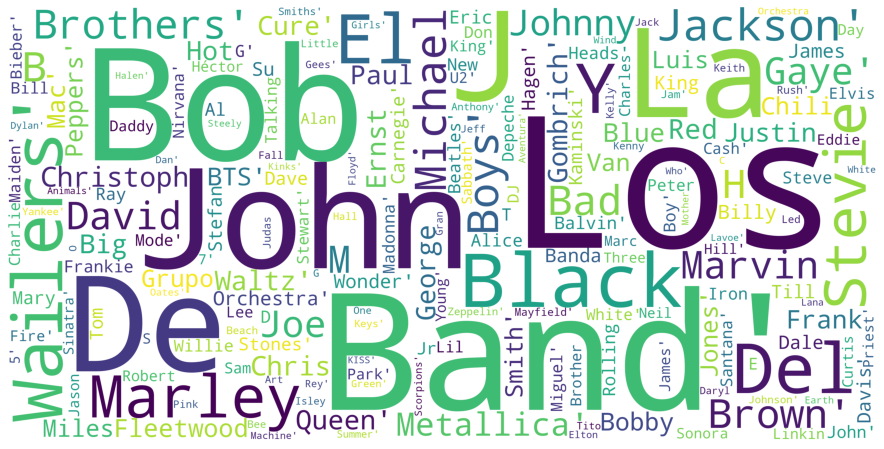

In [84]:
cluster = df_new.loc[df_new['cluster'] == 0]
cluster_corpus = ' '.join(cluster['artists'])
cluster_wordcloud = WordCloud(background_color='white', height=2000, width=4000, collocations=False).generate(cluster_corpus)
plt.figure(figsize=(16,8))
plt.imshow(cluster_wordcloud)
plt.axis('off')
plt.show()

Parece ser um Cluster de Reggae, Rock, com um instrumental bem forte

##### Cluster 1 - Artists

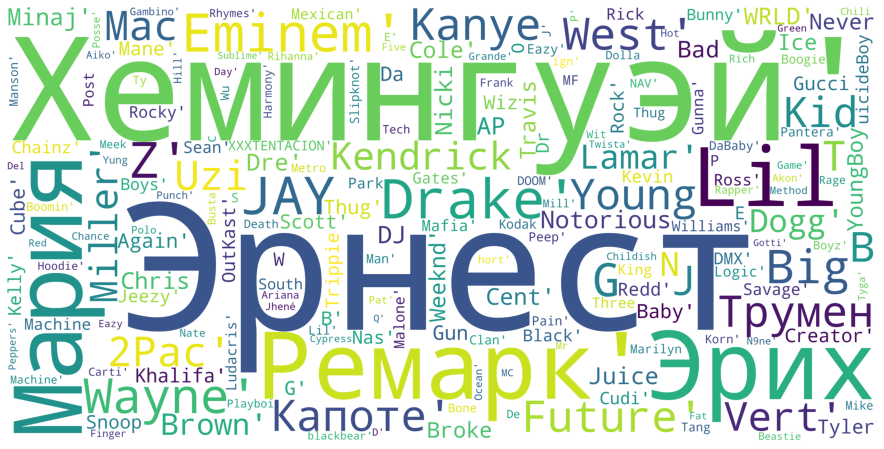

In [85]:
cluster = df_new.loc[df_new['cluster'] == 1]
cluster_corpus = ' '.join(cluster['artists'])
cluster_wordcloud = WordCloud(background_color='white', height=2000, width=4000, collocations=False).generate(cluster_corpus)
plt.figure(figsize=(16,8))
plt.imshow(cluster_wordcloud)
plt.axis('off')
plt.show()

Esse é Rap, sem sombra de dúvidas!

##### Cluster 2 - Artists

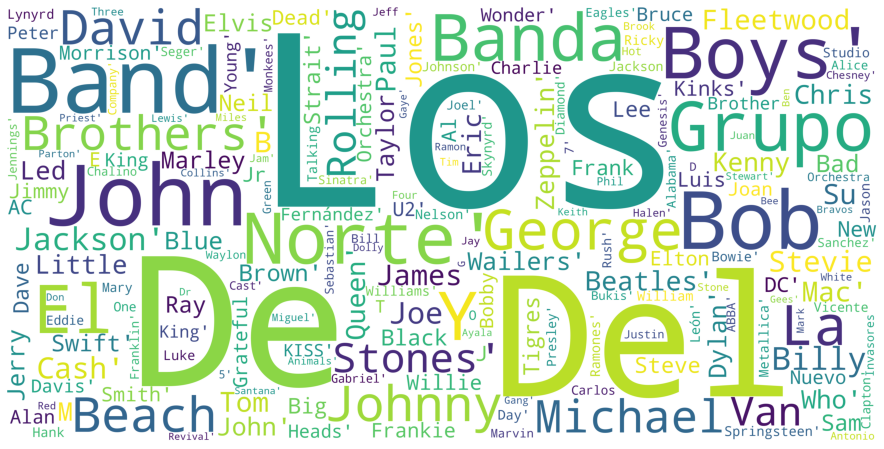

In [86]:
cluster = df_new.loc[df_new['cluster'] == 2]
cluster_corpus = ' '.join(cluster['artists'])
cluster_wordcloud = WordCloud(background_color='white', height=2000, width=4000, collocations=False).generate(cluster_corpus)
plt.figure(figsize=(16,8))
plt.imshow(cluster_wordcloud)
plt.axis('off')
plt.show()

Me parece ser Rock, até mesmo parecido com o Cluster 0, porém aqui o Rock ta mais aparente que o Reggae

##### Cluster 3 - Artists

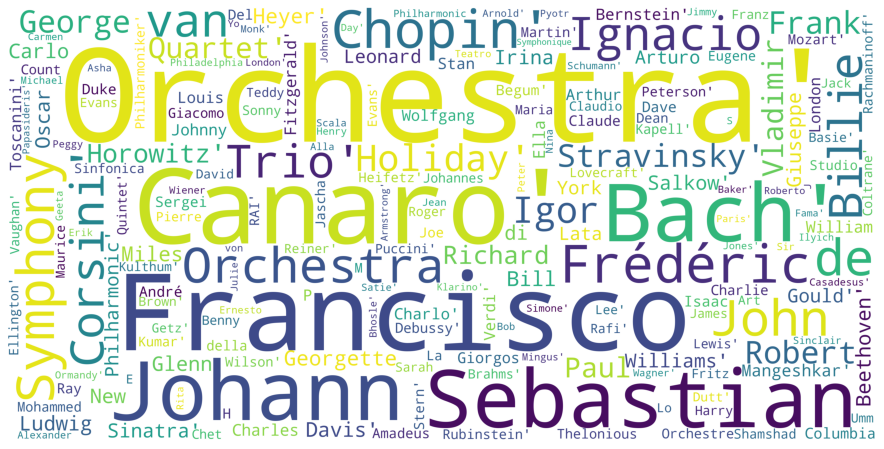

In [87]:
cluster = df_new.loc[df_new['cluster'] == 3]
cluster_corpus = ' '.join(cluster['artists'])
cluster_wordcloud = WordCloud(background_color='white', height=2000, width=4000, collocations=False).generate(cluster_corpus)
plt.figure(figsize=(16,8))
plt.imshow(cluster_wordcloud)
plt.axis('off')
plt.show()

Música clássica! Sem sombra de dúvidas

##### Cluster 4 - Artists

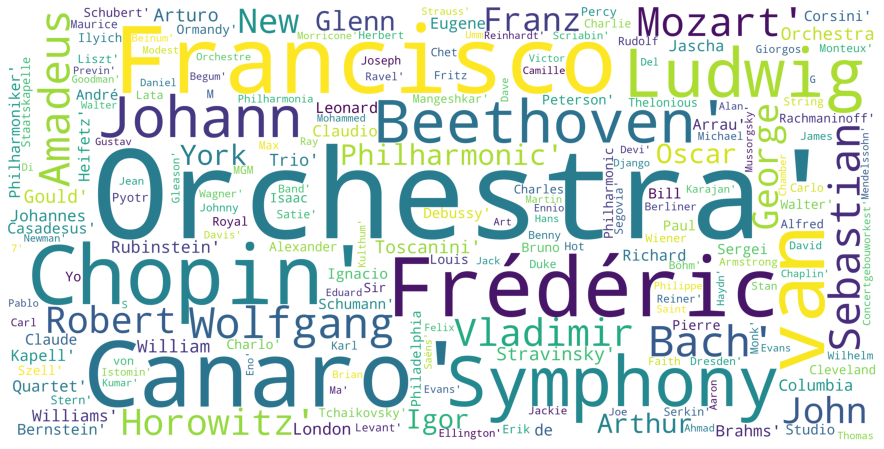

In [88]:
cluster = df_new.loc[df_new['cluster'] == 4]
cluster_corpus = ' '.join(cluster['artists'])
cluster_wordcloud = WordCloud(background_color='white', height=2000, width=4000, collocations=False).generate(cluster_corpus)
plt.figure(figsize=(16,8))
plt.imshow(cluster_wordcloud)
plt.axis('off')
plt.show()

Também música clássica. Confesso que não conheço de música clássica, mas imagino que hajam diferenças entre os compositores. No cluster anterior eram Chopin e Beethoven eram bem menos evidentes que nesse

##### Cluster 5 - Artists

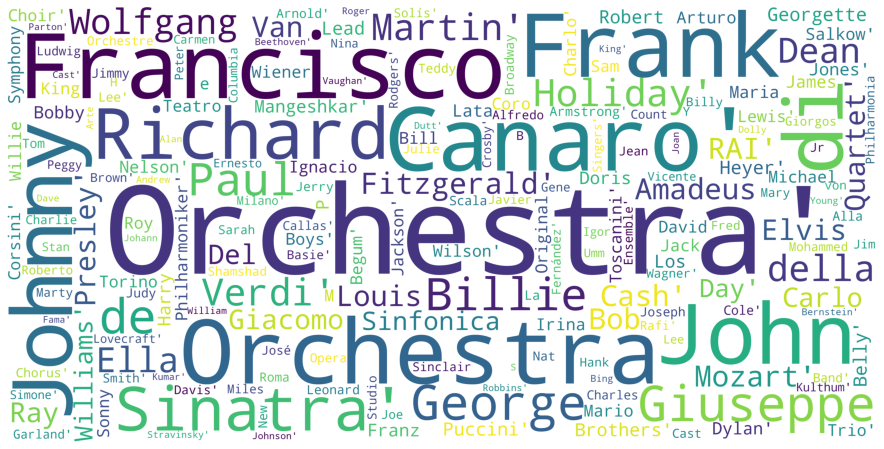

In [89]:
cluster = df_new.loc[df_new['cluster'] == 5]
cluster_corpus = ' '.join(cluster['artists'])
cluster_wordcloud = WordCloud(background_color='white', height=2000, width=4000, collocations=False).generate(cluster_corpus)
plt.figure(figsize=(16,8))
plt.imshow(cluster_wordcloud)
plt.axis('off')
plt.show()

Aqui já aparece uma mistura de música clássica com Jazz

##### Cluster 6 - Artists

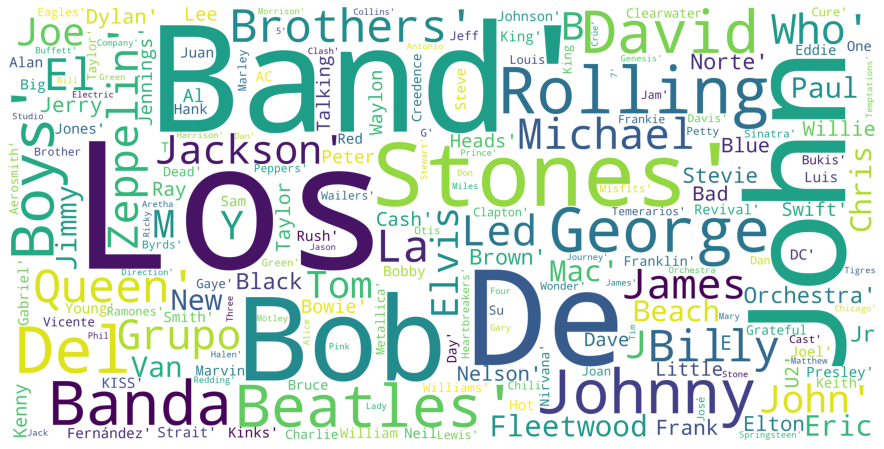

In [90]:
cluster = df_new.loc[df_new['cluster'] == 6]
cluster_corpus = ' '.join(cluster['artists'])
cluster_wordcloud = WordCloud(background_color='white', height=2000, width=4000, collocations=False).generate(cluster_corpus)
plt.figure(figsize=(16,8))
plt.imshow(cluster_wordcloud)
plt.axis('off')
plt.show()

Também me parece Rock. Podemos ver claramente Beatles, Queen, Rolling Stones, Led Zeppelin, entre outros